In [57]:
import pandas as pd
import numpy as np

def generate_synthetic_df(n = 100, seed = 0):

    df = pd.DataFrame()

    np.random.seed(seed)

    # Continuous
    df["ANNUAL_KILOMETERS_QUANTITY"] = np.clip(np.random.normal(loc=12000, scale=7000, size=n), 0, 100000).astype(int)
    df["DRIVER_AGE"] = np.clip(np.random.normal(loc=50, scale=17, size=n), 15, 120).astype(int)
    df["VEHICLE_AGE"] = np.clip(np.random.normal(loc=7, scale=6, size=n), 0, 50).astype(int)
    df["VEHICLE_PRICE"] = np.clip(np.random.normal(loc=15000, scale=11000, size=n), 100, 500000).astype(int)
    # Categorical
    df["DRIVER_TRAINING_INDICATOR_PRINCIPAL"] = np.random.choice([False, True], size=n, p=[0.87, 0.13])
    df["LEASED_VEHICLE_INDICATOR"] = np.random.choice([False, True], size=n, p=[0.94, 0.06])
    df["MARITAL_STATUS"] = np.random.choice(["Not_Single", "Single"], size=n, p=[0.63, 0.37])
    df["NUMBER_OF_CLAIMS_PAST_5YEARS"] = np.random.choice([0, 1, 2, 3], size=n, p=[0.75, 0.15, 0.08, 0.02])
    df["NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS"] = np.random.choice([0, 1, 2, 3], size=n, p=[0.80, 0.15, 0.04, 0.01])

    return df



In [58]:
from models import Models
from models_dict_v2 import model_dict
from generate_synthetic_df import generate_synthetic_df

# Create synthetic dataframe
df = generate_synthetic_df(100, 0)

# Instantiate an object from the class "Models"
models = Models(model_dict)

# Calculate the cost and price
cost = models.calculate_cost(df)
pricing = models.calculate_pricing(df)

# Calculate the profit on the synthetic dataframe
df["profit"] = models.calculate_profit(cost, pricing)

# Create identification variable
df["id"] = np.tile(np.arange(100), 1)

# Create time period variable
df["time"] = 1


In [59]:
df

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time
0,24348,82,4,628,False,False,Not_Single,0,0,110.348016,0,1
1,14801,27,5,33239,False,False,Not_Single,0,0,-66.995161,1,1
2,18851,28,13,13700,False,False,Not_Single,0,0,-4.442560,2,1
3,27686,66,10,7518,True,True,Single,0,0,65.066674,3,1
4,25072,30,10,22330,False,False,Single,0,0,-65.328264,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,16946,47,13,6623,False,False,Not_Single,0,0,37.958626,95,1
96,12073,63,7,24437,True,False,Not_Single,3,0,21.753299,96,1
97,24501,63,10,27552,False,False,Single,0,0,47.087766,97,1
98,12888,86,4,31132,False,False,Not_Single,1,0,125.165869,98,1


In [60]:
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].apply(lambda x: True if x == 'Single' else False)

In [61]:
df

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time
0,24348,82,4,628,False,False,False,0,0,110.348016,0,1
1,14801,27,5,33239,False,False,False,0,0,-66.995161,1,1
2,18851,28,13,13700,False,False,False,0,0,-4.442560,2,1
3,27686,66,10,7518,True,True,True,0,0,65.066674,3,1
4,25072,30,10,22330,False,False,True,0,0,-65.328264,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,16946,47,13,6623,False,False,False,0,0,37.958626,95,1
96,12073,63,7,24437,True,False,False,3,0,21.753299,96,1
97,24501,63,10,27552,False,False,True,0,0,47.087766,97,1
98,12888,86,4,31132,False,False,False,1,0,125.165869,98,1


In [160]:
!pip install scikit-learn

In [29]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [62]:
#y is our target variables, x is our predictors
X = df.drop('profit', axis=1)
y = df['profit']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
regressor = DecisionTreeRegressor(max_depth=3)  # You can adjust max_depth for the complexity of the tree
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)

# Evaluate the performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 671.2423689847332


In [65]:
def get_leaf_indices(tree):
    """ Return the indices of the leaf nodes in the decision tree. """
    return np.where(tree.tree_.children_left == tree.tree_.children_right)[0]

# Get the leaf node indices for the trained regressor
states= get_leaf_indices(regressor)
print(f"states: {states}")

states: [ 3  4  6  7 10 11 13 14]


In [66]:
def get_state_of_one_year(x, regressor, states):
    x_leaf_id = regressor.apply(x)
    x_states = np.empty(len(x), dtype = np.uint16)
    for k in range(len(x)):
        x_states[k] = np.where(states == x_leaf_id[k])[0][0]
    return x_states

df["states"]=get_state_of_one_year(X, regressor, states)
df

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time,states
0,24348,82,4,628,False,False,False,0,0,110.348016,0,1,7
1,14801,27,5,33239,False,False,False,0,0,-66.995161,1,1,0
2,18851,28,13,13700,False,False,False,0,0,-4.442560,2,1,1
3,27686,66,10,7518,True,True,True,0,0,65.066674,3,1,5
4,25072,30,10,22330,False,False,True,0,0,-65.328264,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16946,47,13,6623,False,False,False,0,0,37.958626,95,1,4
96,12073,63,7,24437,True,False,False,3,0,21.753299,96,1,5
97,24501,63,10,27552,False,False,True,0,0,47.087766,97,1,5
98,12888,86,4,31132,False,False,False,1,0,125.165869,98,1,7


In [67]:
def extract_leaf_values(regressor):
    # Return the values in the leaves of the decision tree
    return regressor.tree_.value.squeeze()

Profit_Vector = extract_leaf_values(regressor)
Profit_Vector

array([  11.67176364,  -54.6722632 ,  -26.15599992,  -43.46008729,
         -2.36287977,  -96.34987878, -125.42586373,  -62.42789633,
         55.90111487,   35.89532234,   19.6647675 ,   46.44518299,
         99.91385843,   78.75005173,  118.43218929])

In [77]:
#generate second data frame

df1 = generate_synthetic_df(100, 10)

# Instantiate an object from the class "Models"
models = Models(model_dict)

# Calculate the cost and price
cost = models.calculate_cost(df1)
pricing = models.calculate_pricing(df1)

# Calculate the profit on the synthetic dataframe
df1["profit"] = models.calculate_profit(cost, pricing)

# Create identification variable
df1["id"] = np.tile(np.arange(100), 1)

# Create time period variable
df1["time"] = 2


df1['MARITAL_STATUS'] = df1['MARITAL_STATUS'].apply(lambda x: True if x == 'Single' else False)

X1 = df1.drop('profit', axis=1)

#find the states of the new dataframe
df1["states"]=get_state_of_one_year(X1, regressor, states)
df1

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time,states
0,21321,51,7,23308,False,False,False,0,2,10.620815,0,2,4
1,17006,17,14,24674,False,False,True,0,0,-79.556086,1,2,3
2,1182,34,0,12360,True,False,True,0,1,-114.963140,2,2,2
3,11941,57,7,7354,False,False,True,3,0,-25.750635,3,2,5
4,16349,47,0,9814,False,False,True,2,0,-99.813728,4,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,18427,71,9,23846,False,False,True,0,0,75.483135,95,2,6
96,8625,66,8,3663,False,False,True,0,0,63.250932,96,2,5
97,12627,32,6,100,False,False,False,0,0,-15.745341,97,2,1
98,17788,69,7,12068,False,False,True,0,0,69.203679,98,2,6


In [78]:
df_merged=df.merge(df1[['id',"states"]], on="id", how='inner')
df_merged

,ANNUAL_KILOMETERS_QUANTITY,DRIVER_AGE,VEHICLE_AGE,VEHICLE_PRICE,DRIVER_TRAINING_INDICATOR_PRINCIPAL,LEASED_VEHICLE_INDICATOR,MARITAL_STATUS,NUMBER_OF_CLAIMS_PAST_5YEARS,NUMBER_OF_MINOR_CONVICTIONS_PAST_3YEARS,profit,id,time,states_x,states_y
0,24348,82,4,628,False,False,False,0,0,110.348016,0,1,7,4
1,14801,27,5,33239,False,False,False,0,0,-66.995161,1,1,0,3
2,18851,28,13,13700,False,False,False,0,0,-4.442560,2,1,1,2
3,27686,66,10,7518,True,True,True,0,0,65.066674,3,1,5,5
4,25072,30,10,22330,False,False,True,0,0,-65.328264,4,1,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16946,47,13,6623,False,False,False,0,0,37.958626,95,1,4,6
96,12073,63,7,24437,True,False,False,3,0,21.753299,96,1,5,5
97,24501,63,10,27552,False,False,True,0,0,47.087766,97,1,5,1
98,12888,86,4,31132,False,False,False,1,0,125.165869,98,1,7,6


In [79]:
import pandas as pd


def compute_transition_matrix(df):
    # Create a crosstab table (transition counts)
    cross_tab = pd.crosstab(df['states_x'], df['states_y'])
    
    # Convert counts to probabilities (normalize rows to sum to 1)
    transition_matrix = cross_tab.div(cross_tab.sum(axis=1), axis=0)
    
    return transition_matrix

# Compute the transition matrix
transition_matrix = compute_transition_matrix(df_merged)

print(transition_matrix)


states_y         0         1         2         3         4         5  \
states_x                                                               
0         0.307692  0.076923  0.000000  0.153846  0.153846  0.153846   
1         0.166667  0.083333  0.166667  0.083333  0.083333  0.416667   
2         0.000000  0.083333  0.083333  0.083333  0.250000  0.333333   
3         0.166667  0.000000  0.000000  0.166667  0.333333  0.000000   
4         0.111111  0.055556  0.166667  0.055556  0.222222  0.222222   
5         0.090909  0.363636  0.045455  0.090909  0.045455  0.136364   
6         0.000000  0.000000  0.428571  0.142857  0.142857  0.142857   
7         0.200000  0.000000  0.000000  0.000000  0.500000  0.200000   

states_y         6         7  
states_x                      
0         0.153846  0.000000  
1         0.000000  0.000000  
2         0.166667  0.000000  
3         0.166667  0.166667  
4         0.111111  0.055556  
5         0.136364  0.090909  
6         0.000000  0.142857  


In [82]:
import numpy as np

def compute_transition_matrix(df, possible_states):
    # Create a full matrix with zeros for all possible state transitions
    full_matrix = pd.DataFrame(0, index=possible_states, columns=possible_states)
    
    # Create a crosstab table (transition counts)
    cross_tab = pd.crosstab(df['states_x'], df['states_y'])
    
    # Overlay the cross tabulated counts on the full matrix
    full_matrix.update(cross_tab)
    
    # Convert counts to probabilities (normalize rows to sum to 1)
    transition_matrix = full_matrix.div(full_matrix.sum(axis=1), axis=0)
    
    # Handle any NaN values
    transition_matrix = transition_matrix.fillna(0)
    
    return transition_matrix

# List of all possible states, it can be derived from the dataset if they are known beforehand.
possible_states = list(set(df_merged['states_x']).union(set(df_merged['states_y'])))

# Compute the transition matrix
transition_matrix = compute_transition_matrix(df_merged, possible_states)

print(transition_matrix)


          0         1         2         3         4         5         6  \
0  0.307692  0.076923  0.000000  0.153846  0.153846  0.153846  0.153846   
1  0.166667  0.083333  0.166667  0.083333  0.083333  0.416667  0.000000   
2  0.000000  0.083333  0.083333  0.083333  0.250000  0.333333  0.166667   
3  0.166667  0.000000  0.000000  0.166667  0.333333  0.000000  0.166667   
4  0.111111  0.055556  0.166667  0.055556  0.222222  0.222222  0.111111   
5  0.090909  0.363636  0.045455  0.090909  0.045455  0.136364  0.136364   
6  0.000000  0.000000  0.428571  0.142857  0.142857  0.142857  0.000000   
7  0.200000  0.000000  0.000000  0.000000  0.500000  0.200000  0.100000   

          7  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.166667  
4  0.055556  
5  0.090909  
6  0.142857  
7  0.000000  


In [90]:
#simulation:
#The customer lifetime value (CLV) may be estimated by a Monte Carlo simulation if the profit vector and transition probability matrix are known.

import numpy as np

def clv_simulation(num_periods, num_simulations, initial_state, transition_matrix, profit_vector):
    clvs = []
    
    for _ in range(num_simulations):
        state = initial_state
        clv = 0
        for _ in range(num_periods):
            clv += profit_vector[state]
            # Transition to the next state
            next_states_probs = transition_matrix.iloc[state].values
            state = np.random.choice(len(next_states_probs), p=next_states_probs)
        clvs.append(clv)
        
    return clvs

# Simulation parameters
num_periods = 50         # Number of periods for each simulation
num_simulations = 1000  # Number of simulations
initial_state = 0          # Starting state (modify accordingly)

# Simulate
clvs = clv_simulation(num_periods, num_simulations, init_state, transition_matrix, Profit_Vector)

# Print the average CLV and other statistics if needed
print(f"average of CLV: {np.mean(clvs)}")


average of CLV: -2367.674856163089


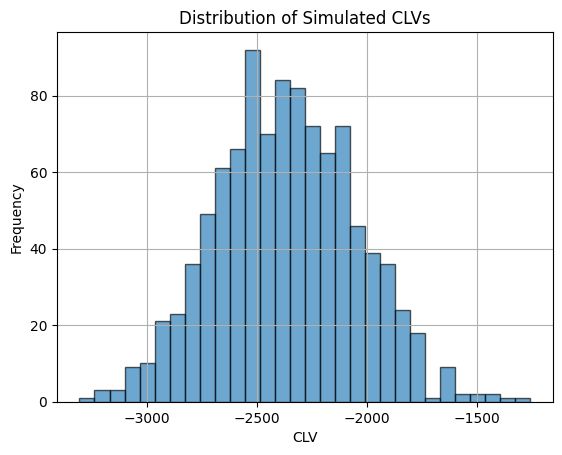

In [91]:
import matplotlib.pyplot as plt

plt.hist(clvs, bins=30, edgecolor='k', alpha=0.65)
plt.title('Distribution of Simulated CLVs')
plt.xlabel('CLV')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


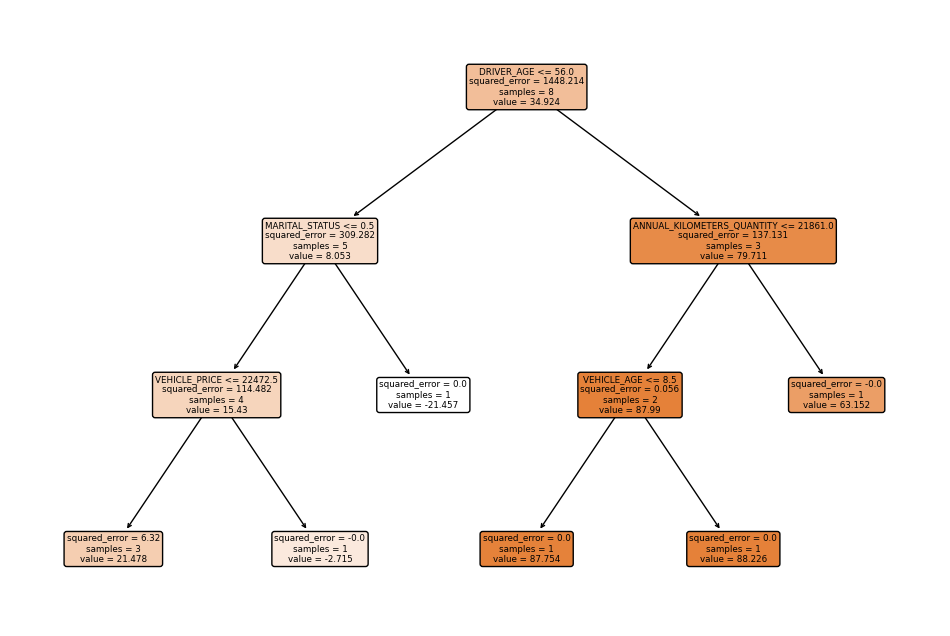

In [102]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=X.columns, rounded=True)
plt.show()